# INTRO

## Dataset

**FBI Gun Data**: The data comes from the FBI\'s National Instant Criminal Background
Check System. The NICS is used by to
determine whether a prospective
buyer is eligible to buy firearms or
explosives. Gun shops call into this
system to ensure that each customer
does not have a criminal record or
isn’t otherwise ineligible to make a
purchase. The data has been
supplemented with state level data
from census.gov

[**Source Data**](https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md)

## Columns clarification:
- **Minors %**: Persons under 18 years percentage at 2016
- **Veterans** : Veterans 2011-2015
- **Highschoolers %**: High school graduate or higher percentage of persons age +25 years 2011-2015
- **BCS Grads %**: Bachelor's degree or higher percentage of persons age +25 years 2011-2015
- **Persons (65+) %**: Persons 65 years and over percentage 2016
- **Disabled %**: Percentage of people with a disability under age 65 years 2011-2015
- **No Health insurance %**: Persons  without health insurance, under age 65 years, percent
- **multiple**: Denotes a background check where more than one type of firearm is associated to a single background check
- **admin**: Denotes the administrative checks that are for other authorized uses of the NICS (National Instant Criminal Background Check System)
- **other**: It could be other firearms that are neither handguns nor long guns. Or a part of a firearm such as hammer or bolt
- **prepawn_handgun/ prepawn_long_gun/prepawn_other**: 
    background checks requested by an officially-licensed FFL on prospective firearm transferees seeking to pledge or pawn a firearm as security for the payment or repayment of money, prior to actually pledging or pawning the firearm.
- **redemption_handgun/redemption_long_gun/redemption_other**
    :background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to regain possession of a firearm after pledging or pawning a firearm as security at a pawn shop.
- **returned_handgun/returned_long_gun/returned_other**: 
    background checks requested by criminal justice/law enforcement agencies prior to returning a firearm in its possession to the respective transferee, to ensure the individual is not prohibited
- **private_sale_handgun/private_sale_long_gun/private_sale_other**:
    background checks requested by an officially-licensed FFL on prospective firearm transferees attempting to possess a firearm from a private party seller who is not an officially-licensed FFL
    

### Purpose of Analysis (Answering following Questions):

* What is the highest poverty state?
* What is the highest state purchase guns?
* Is there a relationship between poverty and total guns purchases ?
* Which states have had the highest growth in gun registrations?
* What is the overall trend of gun purchases


In [1]:
# For data cleaning purpose - check nulls and duplicates:
def check_nulls_duplicates(df):
    print("NULL VALUES: \n\n", df.isnull().sum(), "\n\n")
    print("DUPLICATES: \n", sum(df.duplicated()))
    return

# DATA WARNGLING / CLEANING

In [57]:
import pandas as pd
import numpy as np
import matplotlib as plt
import scipy.stats

In [3]:
census_data_df = pd.read_csv('Project 2 Data/U.S. Census Data.csv')
census_data_df.head()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


In [4]:
census_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 52 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fact            80 non-null     object
 1   Fact Note       28 non-null     object
 2   Alabama         65 non-null     object
 3   Alaska          65 non-null     object
 4   Arizona         65 non-null     object
 5   Arkansas        65 non-null     object
 6   California      65 non-null     object
 7   Colorado        65 non-null     object
 8   Connecticut     65 non-null     object
 9   Delaware        65 non-null     object
 10  Florida         65 non-null     object
 11  Georgia         65 non-null     object
 12  Hawaii          65 non-null     object
 13  Idaho           65 non-null     object
 14  Illinois        65 non-null     object
 15  Indiana         65 non-null     object
 16  Iowa            65 non-null     object
 17  Kansas          65 non-null     object
 18  Kentucky    

In [5]:
census_data_df.shape

(85, 52)

we have 50 state

In [6]:
check_nulls_duplicates(census_data_df)

NULL VALUES: 

 Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           

In [7]:
#Drop unnecessary duplicated rows
census_data_df.drop_duplicates(inplace = True)

#Let's check again
sum(census_data_df.duplicated())

0

**Dropping irrelevant columns to analysis**


In [8]:
census_data_df.drop('Fact Note', axis = 1, inplace = True)

In [9]:
census_data_df = census_data_df.set_index('Fact').T
census_data_df.head()

Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)","Persons 65 years and over, percent, April 1, 2010",...,(c),Value Flags,-,D,F,FN,NaN,S,X,Z
Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,7.70%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,13.80%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,14.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,11.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
census_data_df.reset_index(inplace = True)

In [11]:
census_data_df.head()

Fact,index,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,(c),Value Flags,-,D,F,FN,NaN,S,X,Z
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#let's change 'index' column to more meaningful name
census_data_df.rename(columns = {'index':'state'}, inplace = True)
census_data_df.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2016)","Population, percent change - April 1, 2010 (estimates base) to July 1, 2016, (V2016)","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, (V2016)","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016, (V2016)","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2016, (V2016)",...,(c),Value Flags,-,D,F,FN,NaN,S,X,Z
0,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arizona,"6,931,071","6,392,301",8.40%,"6,392,017",6.30%,7.10%,23.50%,25.50%,16.90%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arkansas,"2,988,248","2,916,025",2.50%,"2,915,918",6.40%,6.80%,23.60%,24.40%,16.30%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,California,"39,250,017","37,254,522",5.40%,"37,253,956",6.30%,6.80%,23.20%,25.00%,13.60%,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
census_data_df.columns

Index([                                                                                 'state',
                                                 'Population estimates, July 1, 2016,  (V2016)',
                                           'Population estimates base, April 1, 2010,  (V2016)',
        'Population, percent change - April 1, 2010 (estimates base) to July 1, 2016,  (V2016)',
                                                            'Population, Census, April 1, 2010',
                                       'Persons under 5 years, percent, July 1, 2016,  (V2016)',
                                                'Persons under 5 years, percent, April 1, 2010',
                                      'Persons under 18 years, percent, July 1, 2016,  (V2016)',
                                               'Persons under 18 years, percent, April 1, 2010',
                                  'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
                              

**Let's drop the irrelevant columns and rename them to meaeningful names.** 

In [14]:
census_data_df = census_data_df[['state', 'Population estimates, July 1, 2016,  (V2016)',
                                 'Persons under 18 years, percent, July 1, 2016,  (V2016)',
                                 'Female persons, percent,  July 1, 2016,  (V2016)',
                                 'Veterans, 2011-2015',
                                 'High school graduate or higher, percent of persons age 25 years+, 2011-2015',
                                 'Bachelor\'s degree or higher, percent of persons age 25 years+, 2011-2015',
                                 'Median household income (in 2015 dollars), 2011-2015',
                                 'Persons in poverty, percent', 'Persons 65 years and over, percent,  July 1, 2016,  (V2016)',
                                 'Foreign born persons, percent, 2011-2015', 
                                 'With a disability, under age 65 years, percent, 2011-2015',
                                 'Persons  without health insurance, under age 65 years, percent','Total employment, 2015',
                                 'Total annual payroll, 2015 ($1,000)']]

census_data_df.head()

Fact,state,"Population estimates, July 1, 2016, (V2016)","Persons under 18 years, percent, July 1, 2016, (V2016)","Female persons, percent, July 1, 2016, (V2016)","Veterans, 2011-2015","High school graduate or higher, percent of persons age 25 years+, 2011-2015","Bachelor's degree or higher, percent of persons age 25 years+, 2011-2015","Median household income (in 2015 dollars), 2011-2015","Persons in poverty, percent","Persons 65 years and over, percent, July 1, 2016, (V2016)","Foreign born persons, percent, 2011-2015","With a disability, under age 65 years, percent, 2011-2015","Persons without health insurance, under age 65 years, percent","Total employment, 2015","Total annual payroll, 2015 ($1,000)"
0,Alabama,"4,863,300",22.60%,51.60%,"363,170",84.30%,23.50%,"$43,623",17.10%,16.10%,3.50%,11.80%,10.70%,"1,634,391","67,370,353"
1,Alaska,"741,894",25.20%,47.70%,"69,323",92.10%,28.00%,"$72,515",9.90%,10.40%,7.40%,8.10%,15.50%,"267,999","15,643,303"
2,Arizona,"6,931,071",23.50%,50.30%,"505,794",86.00%,27.50%,"$50,255",16.40%,16.90%,13.50%,8.20%,11.90%,"2,295,186","102,671,393"
3,Arkansas,"2,988,248",23.60%,50.90%,"220,953",84.80%,21.10%,"$41,371",17.20%,16.30%,4.70%,12.30%,9.30%,"1,003,113","39,451,191"
4,California,"39,250,017",23.20%,50.30%,"1,777,410",81.80%,31.40%,"$61,818",14.30%,13.60%,27.00%,6.80%,8.30%,"14,325,377","856,954,246"


In [15]:
census_data_df.columns =['state', 'Population','Minors %','Females %','Veterans','Highschoolers %',
                         'BCS Grads %','Median Houshold Income','Poverty %', 'Persons (65+) %', 'Foreign born', 
                         'Disabled %', 'No Health insurance %', 'Total Employment', 'Total Annual payroll']

In [16]:
#checking
census_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   state                   50 non-null     object
 1   Population              50 non-null     object
 2   Minors %                50 non-null     object
 3   Females %               50 non-null     object
 4   Veterans                50 non-null     object
 5   Highschoolers %         50 non-null     object
 6   BCS Grads %             50 non-null     object
 7   Median Houshold Income  50 non-null     object
 8   Poverty %               50 non-null     object
 9   Persons (65+) %         50 non-null     object
 10  Foreign born            50 non-null     object
 11  Disabled %              50 non-null     object
 12  No Health insurance %   50 non-null     object
 13  Total Employment        50 non-null     object
 14  Total Annual payroll    50 non-null     object
dtypes: objec

**We need to change the data type into integers/float for the calculations**

In [17]:
chars = [',' ,'%', ' ']
census_data_df.replace(chars,'', regex=True, inplace=True)

In [18]:
census_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   state                   50 non-null     object
 1   Population              50 non-null     object
 2   Minors %                50 non-null     object
 3   Females %               50 non-null     object
 4   Veterans                50 non-null     object
 5   Highschoolers %         50 non-null     object
 6   BCS Grads %             50 non-null     object
 7   Median Houshold Income  50 non-null     object
 8   Poverty %               50 non-null     object
 9   Persons (65+) %         50 non-null     object
 10  Foreign born            50 non-null     object
 11  Disabled %              50 non-null     object
 12  No Health insurance %   50 non-null     object
 13  Total Employment        50 non-null     object
 14  Total Annual payroll    50 non-null     object
dtypes: objec

In [19]:
census_data_df.head()

,state,Population,Minors %,Females %,Veterans,Highschoolers %,BCS Grads %,Median Houshold Income,Poverty %,Persons (65+) %,Foreign born,Disabled %,No Health insurance %,Total Employment,Total Annual payroll
0,Alabama,4863300,22.60,51.60,363170,84.30,23.50,$43623,17.10,16.10,3.50,11.80,10.70,1634391,67370353
1,Alaska,741894,25.20,47.70,69323,92.10,28.00,$72515,9.90,10.40,7.40,8.10,15.50,267999,15643303
2,Arizona,6931071,23.50,50.30,505794,86.00,27.50,$50255,16.40,16.90,13.50,8.20,11.90,2295186,102671393
3,Arkansas,2988248,23.60,50.90,220953,84.80,21.10,$41371,17.20,16.30,4.70,12.30,9.30,1003113,39451191
4,California,39250017,23.20,50.30,1777410,81.80,31.40,$61818,14.30,13.60,27.00,6.80,8.30,14325377,856954246


In [20]:
for i in range(50): #To remove $ sign in median income
    census_data_df['Median Houshold Income'][i] = census_data_df['Median Houshold Income'][i][1:]

In [21]:
#first: Removing symplos 
census_data_df.head()

,state,Population,Minors %,Females %,Veterans,Highschoolers %,BCS Grads %,Median Houshold Income,Poverty %,Persons (65+) %,Foreign born,Disabled %,No Health insurance %,Total Employment,Total Annual payroll
0,Alabama,4863300,22.60,51.60,363170,84.30,23.50,43623,17.10,16.10,3.50,11.80,10.70,1634391,67370353
1,Alaska,741894,25.20,47.70,69323,92.10,28.00,72515,9.90,10.40,7.40,8.10,15.50,267999,15643303
2,Arizona,6931071,23.50,50.30,505794,86.00,27.50,50255,16.40,16.90,13.50,8.20,11.90,2295186,102671393
3,Arkansas,2988248,23.60,50.90,220953,84.80,21.10,41371,17.20,16.30,4.70,12.30,9.30,1003113,39451191
4,California,39250017,23.20,50.30,1777410,81.80,31.40,61818,14.30,13.60,27.00,6.80,8.30,14325377,856954246


In [22]:
#Second: convert to an appropiate data type
convert_dict = {'Population': int,
                'Veterans': int,
                'Total Employment' : int,
                'Total Annual payroll': int,
                'Minors %' : float,
                'Females %' : float,
                'Highschoolers %': float,
                'BCS Grads %' : float,
                'Median Houshold Income' : float,
                'Poverty %' : float,
                'Persons (65+) %': float,
                'Foreign born': float,
                'Disabled %': float,
                'No Health insurance %': float
                }
 
census_data_df = census_data_df.astype(convert_dict)
census_data_df.info() #Check!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   50 non-null     object 
 1   Population              50 non-null     int32  
 2   Minors %                50 non-null     float64
 3   Females %               50 non-null     float64
 4   Veterans                50 non-null     int32  
 5   Highschoolers %         50 non-null     float64
 6   BCS Grads %             50 non-null     float64
 7   Median Houshold Income  50 non-null     float64
 8   Poverty %               50 non-null     float64
 9   Persons (65+) %         50 non-null     float64
 10  Foreign born            50 non-null     float64
 11  Disabled %              50 non-null     float64
 12  No Health insurance %   50 non-null     float64
 13  Total Employment        50 non-null     int32  
 14  Total Annual payroll    50 non-null     int3

In [23]:
check_nulls_duplicates(census_data_df)

NULL VALUES: 

 state                     0
Population                0
Minors %                  0
Females %                 0
Veterans                  0
Highschoolers %           0
BCS Grads %               0
Median Houshold Income    0
Poverty %                 0
Persons (65+) %           0
Foreign born              0
Disabled %                0
No Health insurance %     0
Total Employment          0
Total Annual payroll      0
dtype: int64 


DUPLICATES: 
 0


In [24]:
census_data_df.head()

,state,Population,Minors %,Females %,Veterans,Highschoolers %,BCS Grads %,Median Houshold Income,Poverty %,Persons (65+) %,Foreign born,Disabled %,No Health insurance %,Total Employment,Total Annual payroll
0,Alabama,4863300,22.6,51.6,363170,84.3,23.5,43623.0,17.1,16.1,3.5,11.8,10.7,1634391,67370353
1,Alaska,741894,25.2,47.7,69323,92.1,28.0,72515.0,9.9,10.4,7.4,8.1,15.5,267999,15643303
2,Arizona,6931071,23.5,50.3,505794,86.0,27.5,50255.0,16.4,16.9,13.5,8.2,11.9,2295186,102671393
3,Arkansas,2988248,23.6,50.9,220953,84.8,21.1,41371.0,17.2,16.3,4.7,12.3,9.3,1003113,39451191
4,California,39250017,23.2,50.3,1777410,81.8,31.4,61818.0,14.3,13.6,27.0,6.8,8.3,14325377,856954246


#### Let's do the same initial steps to the other dataframe

In [25]:
gun_data_df = pd.read_excel('Project 2 Data/gun_data.xlsx')
gun_data_df.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [26]:
gun_data_df.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

### Selecting columns

In [27]:
#Selecting attributes
gun_data_df = gun_data_df[['month', 'state', 'permit', 'handgun', 'long_gun', 'other', 'multiple','admin', 
                           'prepawn_handgun', 'prepawn_long_gun','prepawn_other', 
                           'redemption_handgun', 'redemption_long_gun', 'redemption_other', 
                           'returned_handgun', 'returned_long_gun', 'returned_other',
                           'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other', 'totals']]

gun_data_df.head()

,month,state,permit,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,...,redemption_handgun,redemption_long_gun,redemption_other,returned_handgun,returned_long_gun,returned_other,private_sale_handgun,private_sale_long_gun,private_sale_other,totals
0,2017-09,Alabama,16717.0,5734.0,6320.0,221.0,317,0.0,15.0,21.0,...,1378.0,1262.0,1.0,0.0,0.0,0.0,9.0,16.0,3.0,32019
1,2017-09,Alaska,209.0,2320.0,2930.0,219.0,160,0.0,5.0,2.0,...,200.0,154.0,2.0,28.0,30.0,0.0,17.0,24.0,1.0,6303
2,2017-09,Arizona,5069.0,11063.0,7946.0,920.0,631,0.0,13.0,6.0,...,1474.0,748.0,3.0,82.0,5.0,0.0,38.0,12.0,2.0,28394
3,2017-09,Arkansas,2935.0,4347.0,6063.0,165.0,366,51.0,12.0,13.0,...,1296.0,1824.0,4.0,0.0,0.0,0.0,13.0,23.0,0.0,17747
4,2017-09,California,57839.0,37165.0,24581.0,2984.0,0,0.0,0.0,0.0,...,535.0,397.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [28]:
gun_data_df.shape

(12485, 21)

In [29]:
check_nulls_duplicates(gun_data_df)

NULL VALUES: 

 month                        0
state                        0
permit                      24
handgun                     20
long_gun                    19
other                     6985
multiple                     0
admin                       23
prepawn_handgun           1943
prepawn_long_gun          1945
prepawn_other             7370
redemption_handgun        1940
redemption_long_gun       1941
redemption_other          7370
returned_handgun         10285
returned_long_gun        10340
returned_other           10670
private_sale_handgun      9735
private_sale_long_gun     9735
private_sale_other        9735
totals                       0
dtype: int64 


DUPLICATES: 
 0


In [30]:
gun_data_df.fillna(0, inplace = True)
check_nulls_duplicates(gun_data_df) #Check again

NULL VALUES: 

 month                    0
state                    0
permit                   0
handgun                  0
long_gun                 0
other                    0
multiple                 0
admin                    0
prepawn_handgun          0
prepawn_long_gun         0
prepawn_other            0
redemption_handgun       0
redemption_long_gun      0
redemption_other         0
returned_handgun         0
returned_long_gun        0
returned_other           0
private_sale_handgun     0
private_sale_long_gun    0
private_sale_other       0
totals                   0
dtype: int64 


DUPLICATES: 
 0


In [70]:
df['month'] = pd.to_datetime(df['month'])

In [31]:
#aggregate each 3 columns to one total column 

gun_data_df['prepawn'] = gun_data_df['prepawn_handgun'] + gun_data_df['prepawn_long_gun'] + gun_data_df['prepawn_other']
gun_data_df['redemption'] = gun_data_df['redemption_handgun'] + gun_data_df['redemption_long_gun'] + gun_data_df['redemption_other']
gun_data_df['returned'] = gun_data_df['returned_handgun'] + gun_data_df['returned_long_gun'] + gun_data_df['returned_other']
gun_data_df['private_sale'] = gun_data_df['private_sale_handgun'] + gun_data_df['private_sale_long_gun'] + gun_data_df['private_sale_other']


In [32]:
#drop unnecessary columns
columns = ['prepawn_handgun', 'prepawn_long_gun', 'prepawn_other',
           'redemption_handgun', 'redemption_long_gun', 'redemption_other',
           'returned_handgun', 'returned_long_gun', 'returned_other',
           'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other']

gun_data_df.drop(columns, axis = 1, inplace = True)

In [33]:
gun_data_df.head()

,month,state,permit,handgun,long_gun,other,multiple,admin,totals,prepawn,redemption,returned,private_sale
0,2017-09,Alabama,16717.0,5734.0,6320.0,221.0,317,0.0,32019,38.0,2641.0,0.0,28.0
1,2017-09,Alaska,209.0,2320.0,2930.0,219.0,160,0.0,6303,7.0,356.0,58.0,42.0
2,2017-09,Arizona,5069.0,11063.0,7946.0,920.0,631,0.0,28394,19.0,2225.0,87.0,52.0
3,2017-09,Arkansas,2935.0,4347.0,6063.0,165.0,366,51.0,17747,25.0,3124.0,0.0,36.0
4,2017-09,California,57839.0,37165.0,24581.0,2984.0,0,0.0,123506,0.0,937.0,0.0,0.0


We need to merge the 2 dataframes on the common states.

In [34]:
df = pd.merge(gun_data_df, census_data_df, on=["state"])
df.head()

,month,state,permit,handgun,long_gun,other,multiple,admin,totals,prepawn,...,Highschoolers %,BCS Grads %,Median Houshold Income,Poverty %,Persons (65+) %,Foreign born,Disabled %,No Health insurance %,Total Employment,Total Annual payroll
0,2017-09,Alabama,16717.0,5734.0,6320.0,221.0,317,0.0,32019,38.0,...,84.3,23.5,43623.0,17.1,16.1,3.5,11.8,10.7,1634391,67370353
1,2017-08,Alabama,19733.0,6289.0,6045.0,216.0,311,0.0,35038,25.0,...,84.3,23.5,43623.0,17.1,16.1,3.5,11.8,10.7,1634391,67370353
2,2017-07,Alabama,18042.0,6046.0,4790.0,224.0,258,0.0,31474,20.0,...,84.3,23.5,43623.0,17.1,16.1,3.5,11.8,10.7,1634391,67370353
3,2017-06,Alabama,19508.0,8275.0,4782.0,254.0,334,0.0,35687,24.0,...,84.3,23.5,43623.0,17.1,16.1,3.5,11.8,10.7,1634391,67370353
4,2017-05,Alabama,18538.0,7198.0,4559.0,254.0,309,0.0,33331,20.0,...,84.3,23.5,43623.0,17.1,16.1,3.5,11.8,10.7,1634391,67370353


In [35]:
df.shape

(9080, 27)

**To make sure of merging results**

In [36]:
common_ststes = np.intersect1d(gun_data_df['state'], census_data_df['state'])
len(common_ststes)

40

In [37]:
df['state'].nunique()

40

Great!

In [38]:
df.columns

Index(['month', 'state', 'permit', 'handgun', 'long_gun', 'other', 'multiple',
       'admin', 'totals', 'prepawn', 'redemption', 'returned', 'private_sale',
       'Population', 'Minors %', 'Females %', 'Veterans', 'Highschoolers %',
       'BCS Grads %', 'Median Houshold Income', 'Poverty %', 'Persons (65+) %',
       'Foreign born', 'Disabled %', 'No Health insurance %',
       'Total Employment', 'Total Annual payroll'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

In [39]:
#import seaborn as sns

#sns.pairplot()

## What is the highest poverty state?

In [40]:
df.groupby(['state'])['Poverty %'].mean().sort_values(ascending = False).head(10)

state
Mississippi    20.8
Louisiana      20.2
Kentucky       18.5
Arkansas       17.2
Alabama        17.1
Arizona        16.4
Georgia        16.0
Texas          15.6
Michigan       15.0
Florida        14.7
Name: Poverty %, dtype: float64

<AxesSubplot:xlabel='state'>

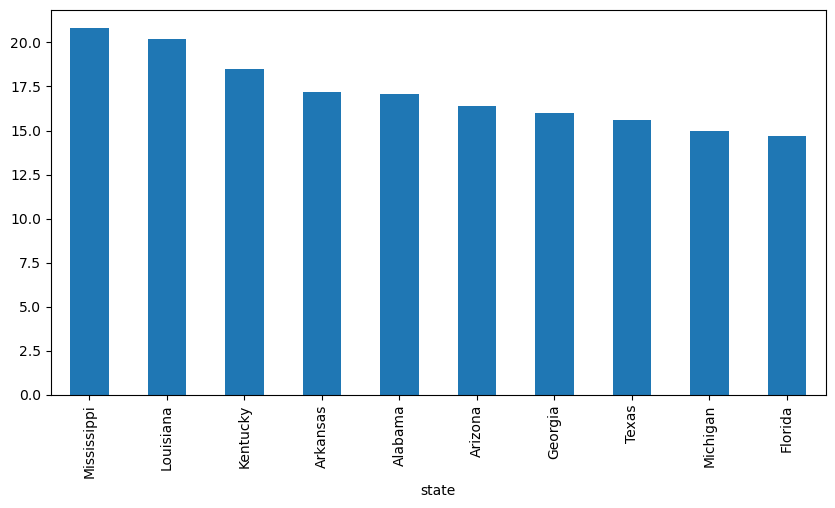

In [41]:
fig_data = df.groupby(['state'])['Poverty %'].mean().sort_values(ascending = False) 
fig_data.head(10).plot(kind='bar', figsize = (10,5))

## What is the highest state permited guns?

**Kentucky have a very large number of permited guns**

In [46]:
df.groupby(['state'])['permit'].sum().sort_values(ascending = False).head(10)

state
Kentucky      24926779.0
Illinois       9498639.0
California     6530543.0
Michigan       3313076.0
Indiana        2965760.0
Texas          2857582.0
Utah           2753458.0
Minnesota      2453637.0
Georgia        1786708.0
Washington     1668159.0
Name: permit, dtype: float64

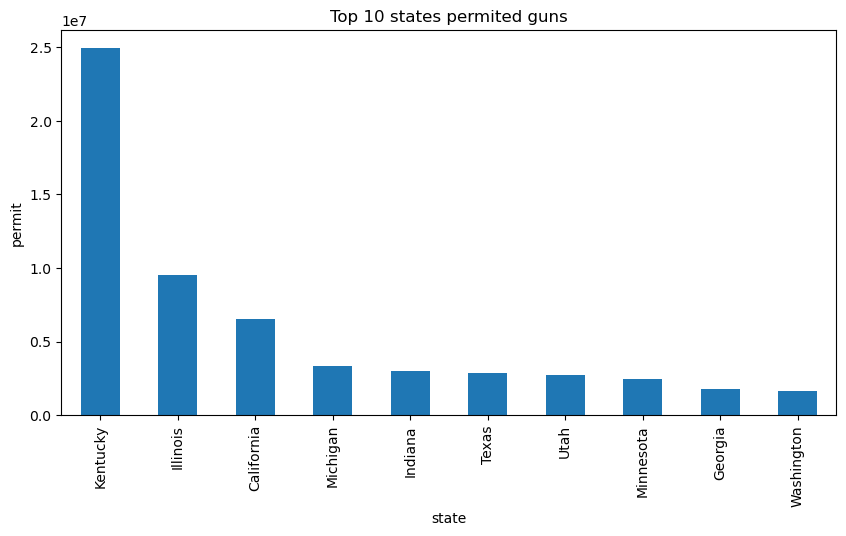

In [47]:
fig_data = df.groupby(['state'])['permit'].sum().sort_values(ascending = False).head(10)

fig_data.head(10).plot(kind='bar', figsize = (10,5), title = "Top 10 states permited guns", ylabel= 'permit');

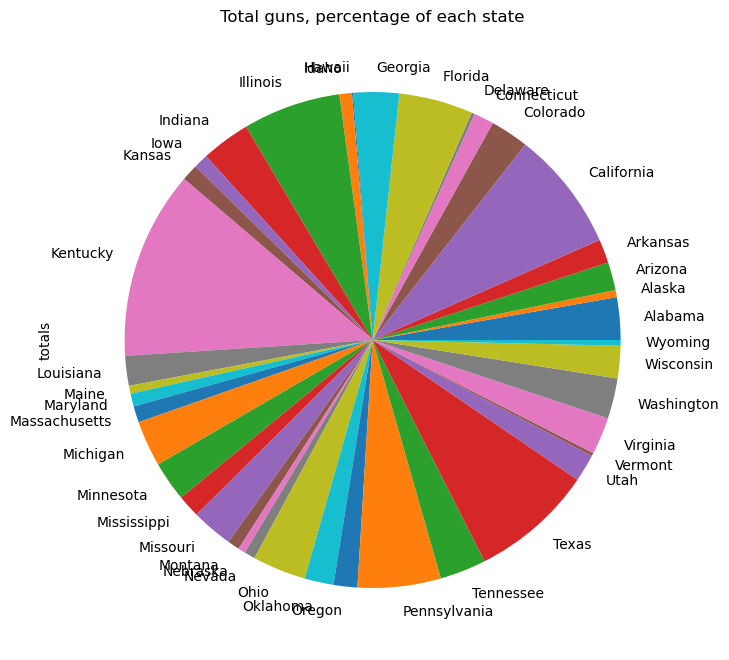

In [101]:
df.groupby(['state'])['totals'].sum().plot(kind = 'pie', figsize = (8,10), title = 'Total guns, percentage of each state');

## Is there a relationship between poverty and total guns purchases ?

<AxesSubplot:xlabel='Poverty %', ylabel='totals'>

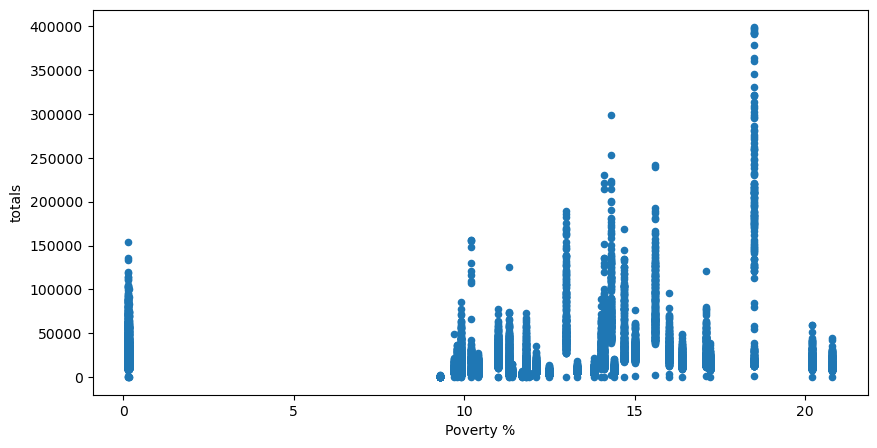

In [53]:
df.plot.scatter(x='Poverty %', y='totals', figsize = (10,5))

Using Pearson Correlation 

Hypotheses

- **H_0**: There's no relationship between Poverty percentage and totals number of guns
- **H_1**: There's a relationship between them

In [60]:
scipy.stats.pearsonr(df['Poverty %'], df['totals'])

PearsonRResult(statistic=0.10232867053962663, pvalue=1.4397837698267533e-22)

**Conclusion**: Since the p-value (Sig. (2-tailed) < 0.05, we reject the Null hypothesis and conclude that there a relationship between Poverty% and totals of guns at each state

In [ ]:
df.head()

## Which states have had the highest growth in gun registrations?

I'm assuming that growth of each state = (the recent record for one state - the earliest record) / the earliest record

In [166]:
#Get the growth of each state between first month and last month
def growth_per_state(state, df):
    df_growth = df[df['state'] == state].sort_values(by='month', ascending=True)
    growth = (df_growth['totals'].iloc[-1] - df_growth['totals'].iloc[0]) / df_growth['totals'].iloc[0]
    
    return growth

In [170]:
states = df['state'].unique()

states_growth = pd.Series()
for state in states:
    x = growth_per_state(state, df)
    states_growth[state] = x
    
states_growth.head()

C:\Users\fatma.saber\AppData\Local\Temp\ipykernel_2360\3298632258.py:2: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  states_growth = pd.Series()


Alabama       29.149718
Alaska        42.468966
Arizona       73.918206
Arkansas      29.130730
California    57.784388
dtype: float64

In [178]:
states_growth.values

array([  29.14971751,   42.46896552,   73.9182058 ,   29.13073005,
         57.78438839,   56.67363344,  150.4625    ,   62.67272727,
         94.30788177,  569.5       ,   32.85714286,   83.875     ,
       5292.13636364,  138.83861671,   19.69502075,   31.30150754,
        473.65      ,   33.81977472,   86.15      ,   34.39308176,
        358.53488372,   35.04292683,  138.66144201,   21.30994898,
         64.0017301 ,   50.15920398,   27.73655914,   58.49685535,
         51.46008403,   35.92101106,   78.29360465, 4528.58823529,
        475.12149533,   44.90551181,   74.05992509,   51.27118644,
       1517.58333333,  118.24930748,  154.62655602,   39.00934579])

In [186]:
states_growth.sort_values(ascending = False)

Illinois         5292.136364
Pennsylvania     4528.588235
Virginia         1517.583333
Georgia           569.500000
Tennessee         475.121495
Kentucky          473.650000
Massachusetts     358.534884
Wisconsin         154.626556
Connecticut       150.462500
Indiana           138.838617
Minnesota         138.661442
Washington        118.249307
Florida            94.307882
Maine              86.150000
Idaho              83.875000
Oregon             78.293605
Utah               74.059925
Arizona            73.918206
Missouri           64.001730
Delaware           62.672727
Nevada             58.496855
California         57.784388
Colorado           56.673633
Ohio               51.460084
Vermont            51.271186
Montana            50.159204
Texas              44.905512
Alaska             42.468966
Wyoming            39.009346
Oklahoma           35.921011
Michigan           35.042927
Maryland           34.393082
Louisiana          33.819775
Hawaii             32.857143
Kansas        

**Illinois** Has the highest growth rate.

## What is the overall trend of gun purchases?

<AxesSubplot:xlabel='month'>

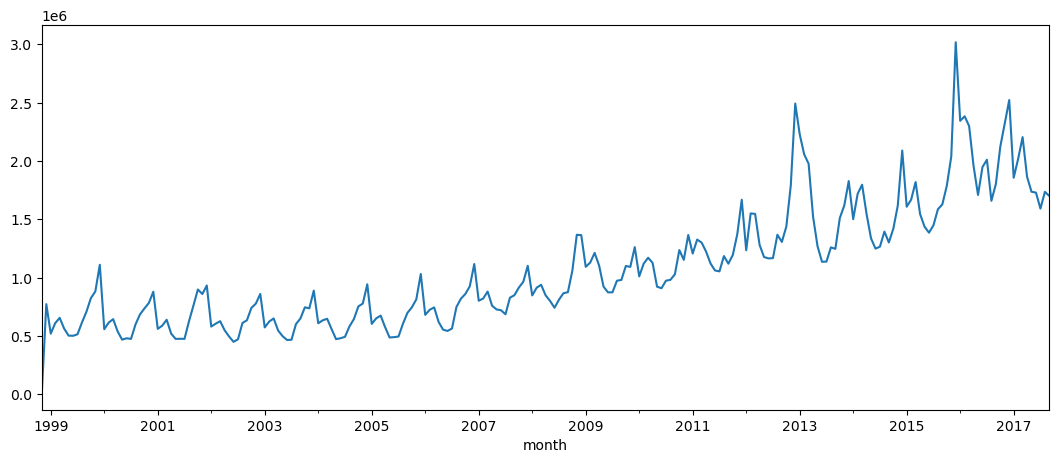

In [81]:
df.groupby(['month'])['totals'].sum().plot.line(x = 'month', y = 'totals', figsize = (13,5))

Looks interesting! Upward trend / cyclic movement

# CONCLUSIONS

* Highest Poverty% in Mississippi and Louisiana (20.8%  and  20.2%) 
* Kentucky have the highest number of permited guns (24,926,779)!
* There's a very weak positive relationship between poverty percentage and totals of guns
* there a relationship between Poverty% and totals of guns at each state
* Illinois Has the highest growth rate.
* Totals guns has upward trend and cyclic movemnt

## Limitation

- Population estimates, percentatge of minors and some other atttibutes are 2016 version, while Veterans and median house hold attributes are 2011-2015 version.
- These statistics represent the number of firearm background checks initiated through the NICS. They do not represent the number of firearms sold. Based on varying state laws and purchase scenarios
